# Build network based on kinase-phosphosite interactions

This notebook provides the code to create a network based on kinase-substrate interactions and the annotated effect of phosphorylation (based on PhosphositePlus) on the activity of the substrate.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko.inputs import Universe, phosphosite
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

CPU times: user 5.41 s, sys: 1.63 s, total: 7.04 s
Wall time: 5.17 s


## 1. Specify kinase-substrate interaction file and phosphosite effect annotation

In this example, both files we utilize are from PhosphositePlus.

In [2]:
kinase_int_file = ("../neko/_data/Kinase_Substrate_Dataset")
phospho_effect_file = ("../neko/_data/Regulatory_sites")

## 2. Add interactions as a resource database

The *_process_psp_interactions_* function parses the provided files to create an interaction database in the Omnipath format.

In [3]:
resources = phosphosite()

## 3. Define a set of phosphosites we are interested in

In [4]:
genes = ['AKT1S1_T246', 'GSK3B_S9', 'AKT1_S473', 'HSPB1_S78', 'HSPB1_S82', 'MAPK14_T180', 'MAPK14_Y182', 'MAP2K1_S218', 'MAP2K1_S222', 'RPS6KA1_S380', 'MTOR_S2448', 'JUN_S63', 'MAPK3_T202', 'MAPK3_Y204']

## 4. Build network

In [5]:
%%time
new_net1 = Network(genes, resources=resources.interactions)

CPU times: user 2.43 s, sys: 156 ms, total: 2.59 s
Wall time: 2.58 s


<div class="alert alert-info">

**Note**
    
Neko is based on UniProt IDs. It is still possible to use databases with other IDs, but an error message will appear during the translation progress, as in the example below.  

</div>  

In [6]:
%%time
new_net1.complete_connection(algorithm= 'bfs',only_signed=True, connect_with_bias=True)

Error: node GSK3B is not present in the resources database
Error: node GSK3B is not present in the resources database
Error: node TBK1 is not present in the resources database
Error: node TBK1 is not present in the resources database
Error: node AKT1 is not present in the resources database
Error: node AKT1 is not present in the resources database
Error: node AKT1 is not present in the resources database
Error: node MAPK14 is not present in the resources database
Error: node MAPK14 is not present in the resources database
Error: node MAPKAPK2 is not present in the resources database
Error: node MAPKAPK2 is not present in the resources database
Error: node MAPK14 is not present in the resources database
Error: node MAP2K1 is not present in the resources database
Error: node MAP2K1 is not present in the resources database
Error: node MAPK3 is not present in the resources database
Error: node MAPK3 is not present in the resources database
Error: node CDK2 is not present in the resources d

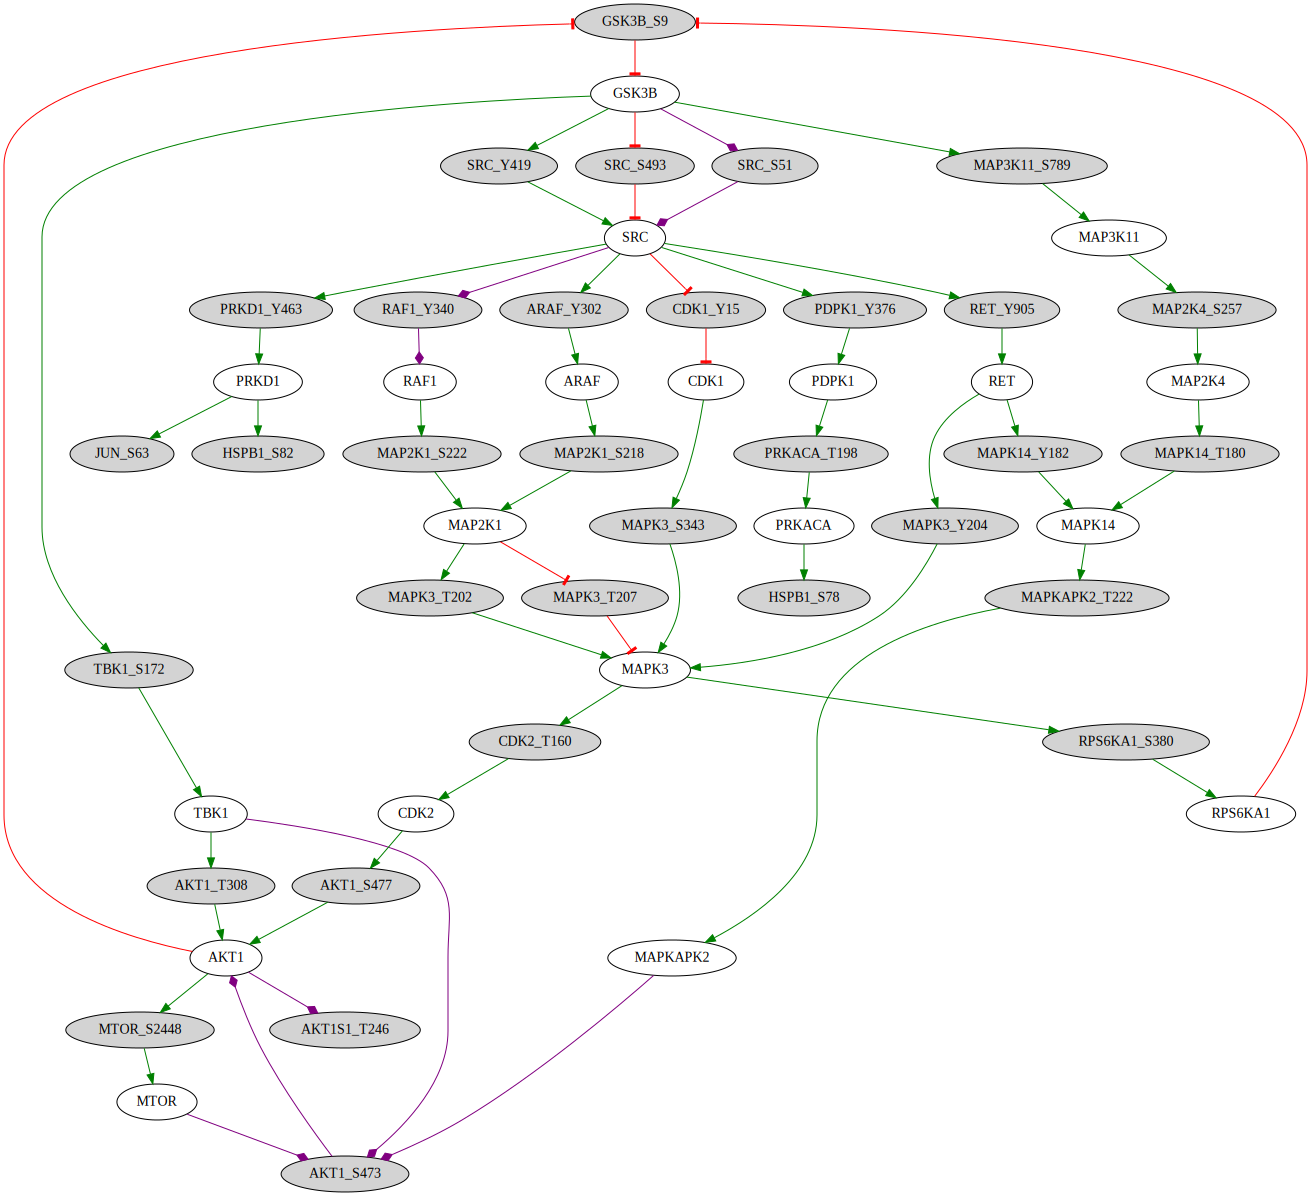

In [7]:
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()